In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv(r'../../results/computed-trajectories2.csv', delimiter=',', skiprows=0, low_memory=False)
df2 = pd.read_csv(r'../../data/tidy/vehicles-summary.csv', delimiter=',', skiprows=0, low_memory=False)

In [3]:
### Map powertrain

In [4]:
mydict = df2.groupby('Type')['Equipment ID'].agg(list).to_dict()
print (mydict)

{'conventional': [1406, 1510, 1513, 1515, 1618, 1619, 1621, 1630, 1632, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1561, 1562, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1701, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1821, 1822, 1823, 1824, 1825, 1826, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1710, 1711, 1712, 1713, 1714, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1670, 1671, 1672, 1673, 1715, 1716, 1717, 1718, 1719, 1720, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1721, 1722, 1723, 1857, 1858, 1859, 1860, 1861, 1724, 1725, 1726, 1727, 1728, 1729, 1862, 1863, 1864, 3211, 3307, 3308, 7610, 7550, 7551, 7660, 7661, 7662, 7552, 7801, 7802, 7811, 7812, 7813, 7814, 7815, 7553, 7554, 7816, 7817, 3201, 3202, 3203, 3203, 3204, 3205, 3212, 3213, 3214, 3215

In [5]:
d = {val:key for key, lst in mydict.items() for val in lst}
df['Powertrain'] = df['Vehicle'].map(d)

In [6]:
df['Powertrain'].unique()

array(['conventional', 'electric', 'hybrid'], dtype=object)

In [7]:
### Map vehicle models

In [8]:
mydict = df2.groupby('Model')['Equipment ID'].agg(list).to_dict()
print (mydict)

{'Gillig 30 ': [1406, 1205], 'Gillig 35': [1510, 1513, 1515, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 7550, 7551, 7552, 3306, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 5574], 'Gillig 40': [1618, 1619, 1621, 1630, 1632, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1670, 1671, 1672, 1673, 3211, 7610, 7660, 7661, 7662, 3201, 3202, 3203, 3203, 3204, 3205, 3212, 3213, 3214, 3215, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3301, 3302, 3303, 3304, 3305, 3316, 3317, 3318, 3319, 3320], 'NEW FLYER XD35': [1701, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 3307, 3308, 7553, 7554], 'NEW FLYER XD40': [1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1821, 1822, 1823, 1824, 1825, 1826, 1830, 1831, 18

In [9]:
d = {val:key for key, lst in mydict.items() for val in lst}
df['VehicleModel'] = df['Vehicle'].map(d)

In [10]:
df['VehicleModel'].unique()

array(['Gillig 30 ', 'NEW FLYER XE35', 'PROTERRA CATALYST BE-40',
       'NEW FLYER XE40', 'Gillig 35', 'Gillig 40', 'NEW FLYER XD35',
       'NEW FLYER XDE40', 'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'],
      dtype=object)

In [12]:
# Assign weights based on vehicle models

In [13]:
df.columns

Index(['Unnamed: 0.1', 'ServiceDateTime', 'Unnamed: 0', 'DateKey',
       'CalendarDate', 'Year', 'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2',
       'Route', 'RouteName', 'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName',
       'Lat', 'Lon', 'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap',
       'Boards', 'Alights', 'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour',
       'Minute', 'Second', 'Date', 'Daytype', 'time', 'time_delta',
       'time_delta_in_seconds', 'dist', 'speed', 'acc', 'Powertrain',
       'VehicleModel'],
      dtype='object')

In [12]:
# weights for different models
thisdict = {
  "Gillig 30 ":25700,
  "Gillig 35":26440,
  "Gillig 40":27180,
  "NEW FLYER XD35": 26900 ,
  "NEW FLYER XD40": 28250 ,
  "NEW FLYER XDE40": 28250 ,
  "NEW FLYER XDE60 (ARTIC)": 42250 ,
  "NEW FLYER XE35": 26900 ,
  "NEW FLYER XE40": 32770 ,
  "PROTERRA CATALYST BE-40": 27370 ,
}

In [13]:
df['VehiclWeight(lb)'] = df['VehicleModel'].map(thisdict)

In [14]:
df['VehiclWeight(lb)'].unique()

array([25700, 26900, 27370, 32770, 26440, 27180, 28250, 42250],
      dtype=int64)

In [15]:
df['Vehicle'][df['VehiclWeight(lb)'].isnull()].unique()

array([], dtype=int64)

In [16]:
# save the final data frame with mapped model and weights
df.to_csv(r'../../results/trajectories-mapped-powertrain-weight.csv')

In [17]:
df[['VehicleModel']].loc[df['Vehicle'] == '7902']

,VehicleModel


In [18]:
df.columns

Index(['Unnamed: 0.1', 'ServiceDateTime', 'Unnamed: 0', 'DateKey',
       'CalendarDate', 'Year', 'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2',
       'Route', 'RouteName', 'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName',
       'Lat', 'Lon', 'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap',
       'Boards', 'Alights', 'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour',
       'Minute', 'Second', 'Date', 'Daytype', 'time', 'time_delta',
       'time_delta_in_seconds', 'dist', 'speed', 'acc', 'Powertrain',
       'VehicleModel', 'VehiclWeight(lb)'],
      dtype='object')

In [19]:
df[['Powertrain','VehicleModel']].loc[df['Vehicle'] == 7902]

,Powertrain,VehicleModel
1355789,hybrid,NEW FLYER XDE60 (ARTIC)
1355790,hybrid,NEW FLYER XDE60 (ARTIC)
1355791,hybrid,NEW FLYER XDE60 (ARTIC)
1355792,hybrid,NEW FLYER XDE60 (ARTIC)
1355793,hybrid,NEW FLYER XDE60 (ARTIC)
...,...,...
1360782,hybrid,NEW FLYER XDE60 (ARTIC)
1360783,hybrid,NEW FLYER XDE60 (ARTIC)
1360784,hybrid,NEW FLYER XDE60 (ARTIC)
1360785,hybrid,NEW FLYER XDE60 (ARTIC)


In [20]:
df['Vehicle'].unique()

array([1205, 1320, 1321, 1322, 1323, 1410, 1411, 1412, 1413, 1415, 1416,
       1420, 1421, 1552, 1553, 1555, 1557, 1563, 1564, 1565, 1566, 1567,
       1568, 1571, 1572, 1574, 1575, 1576, 1577, 1578, 1619, 1640, 1642,
       1643, 1644, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656,
       1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1670, 1671, 1672,
       1701, 1710, 1711, 1712, 1714, 1715, 1716, 1717, 1718, 1719, 1720,
       1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1801, 1802,
       1803, 1804, 1805, 1811, 1812, 1813, 1814, 1815, 1817, 1819, 1821,
       1822, 1823, 1824, 1825, 1826, 1831, 1832, 1833, 1834, 1835, 1836,
       1837, 1840, 1841, 1842, 1843, 1844, 1845, 1847, 1848, 1849, 1850,
       1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861,
       1862, 1864, 3212, 3221, 3222, 3223, 3225, 3226, 3228, 3301, 3302,
       3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313,
       3314, 3316, 3317, 3318, 3319, 3320, 3321, 33

In [15]:
### Plot trajectories (new version facet plot- colored by powertrain- from 5Am-to 5AM)

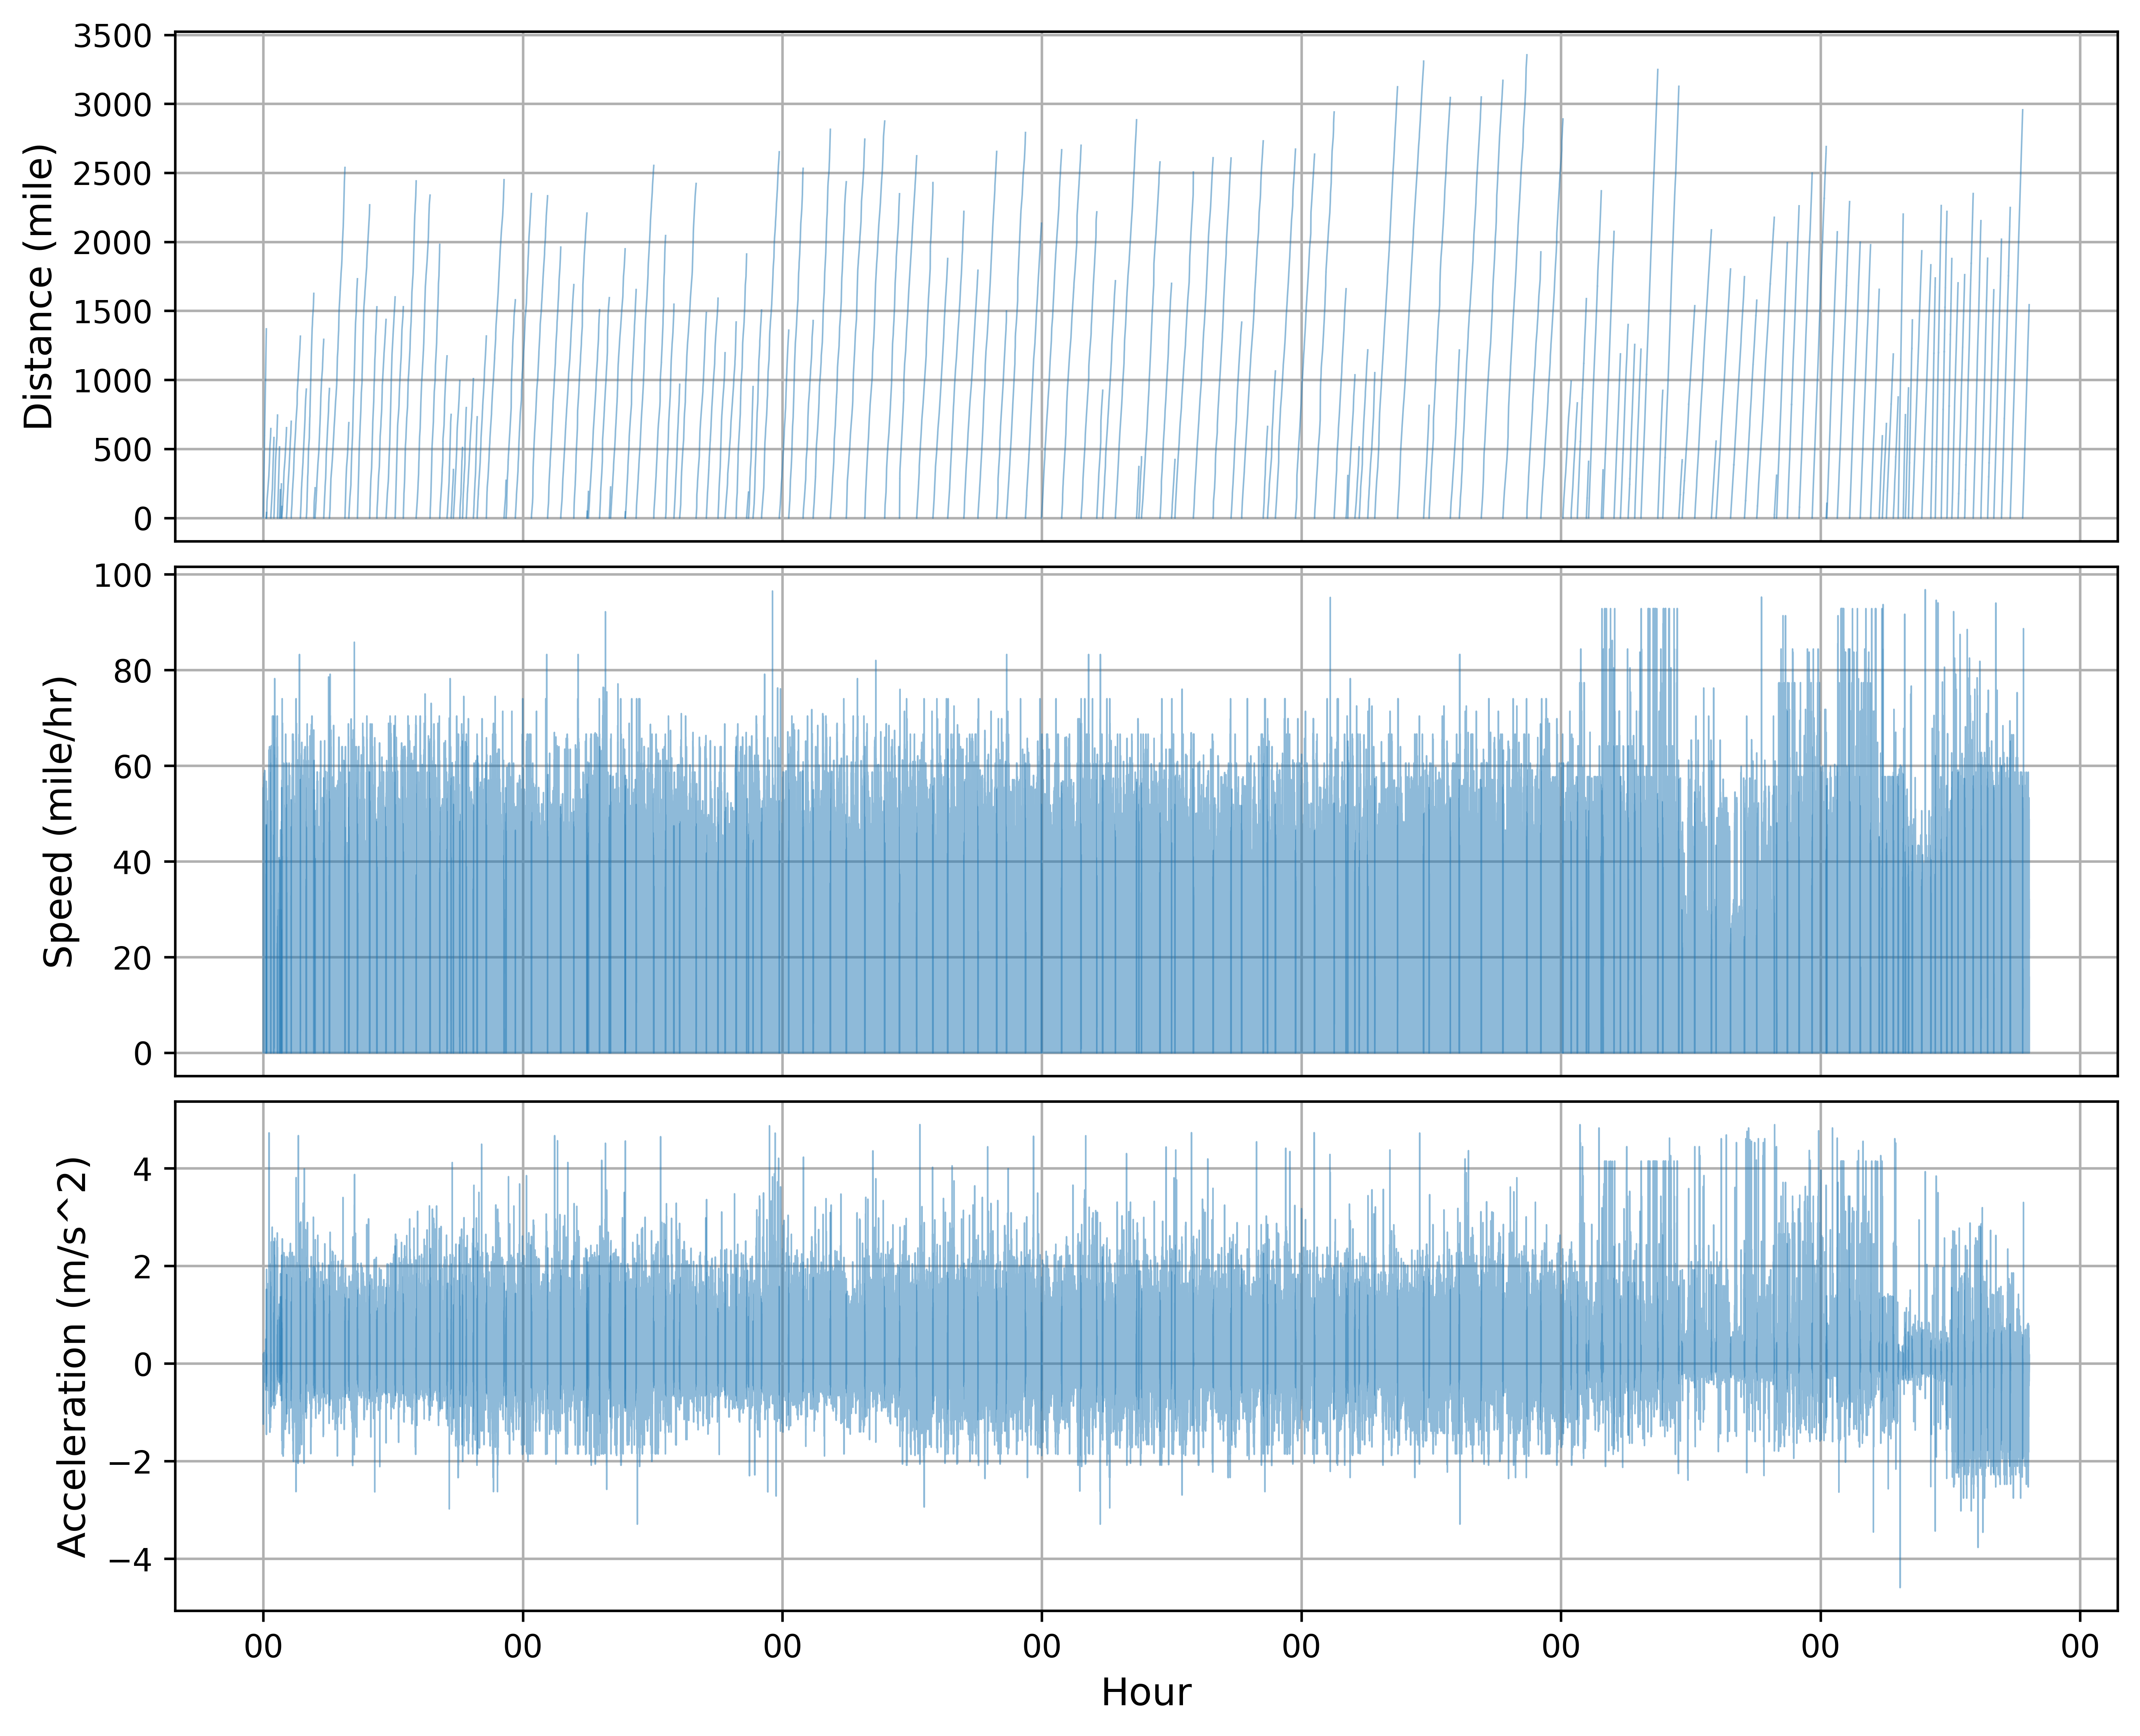

In [20]:
# Create a facet plot with three rows and one column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(11, 9), dpi=600)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.05)

# Plot 1: distance vs. time
vehicle = df['Vehicle'].unique()
for v in vehicle:
    plot_df = df[df['Vehicle'] == v]
    axs[0].plot(plot_df["dist"].cumsum(), marker='', color='#1f77b4', linewidth=0.5, alpha=0.5)
axs[0].set_ylabel("Distance (mile)", fontsize=12)
axs[0].grid()
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot 2: speed vs. time
for v in vehicle:
    plot_df = df[df['Vehicle'] == v]
    axs[1].plot(plot_df["speed"], marker='', color='#1f77b4', linewidth=0.5, alpha=0.5)
axs[1].set_ylabel("Speed (mile/hr)", fontsize=12)
axs[1].grid()
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot 3: acceleration vs. time
for v in vehicle:
    plot_df = df[df['Vehicle'] == v]
    axs[2].plot(plot_df["acc"], marker='', color='#1f77b4', linewidth=0.5, alpha=0.5)
axs[2].set_xlabel("Hour", fontsize=12)
axs[2].set_ylabel("Acceleration (m/s^2)", fontsize=12)
axs[2].grid()
date_form = DateFormatter("%H")
axs[2].xaxis.set_major_formatter(date_form)

# Show the combined plot
plt.show()